In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [2]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

In [3]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

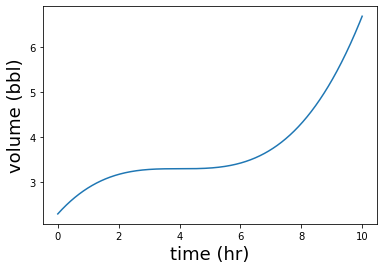

In [4]:
plot_volume(volume,0,10)

In [5]:
def average_flow_rate(v,t1,t2):
    return (v(t2)-v(t1)) / (t2-t1) 

In [6]:
volume(4)

3.3

In [7]:
volume(9)

5.253125

In [8]:
average_flow_rate(volume,4,9)

0.390625

In [9]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

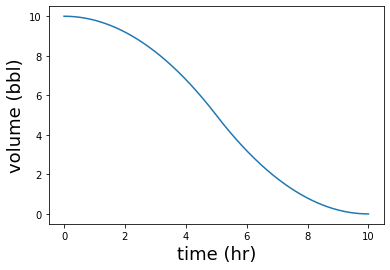

In [10]:
plot_volume(decreasing_volume,0,10)

In [11]:
print((77905-77641)/4.5)

58.666666666666664


In [12]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)
    return line

In [13]:
def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2], [f(x1),f(x2)],c=color)

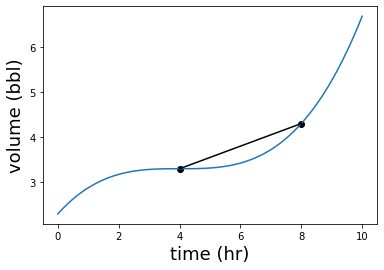

In [14]:
plot_volume(volume,0,10)
plot_secant(volume,4,8)

In [15]:
import numpy as np

In [16]:
def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt))
                for t in np.arange(t1,t2,dt)]

In [17]:
interval_flow_rates(volume,0,10,1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

In [18]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)

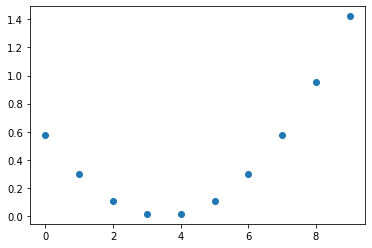

In [19]:
plot_interval_flow_rates(volume,0,10,1)

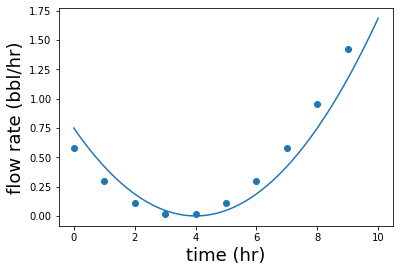

In [20]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1)

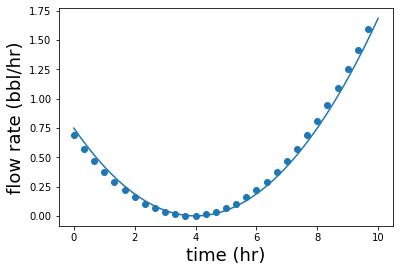

In [21]:
plot_flow_rate(flow_rate,0,10)
plot_interval_flow_rates(volume,0,10,1/3)

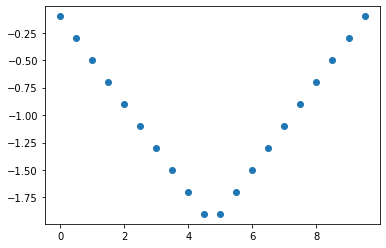

In [22]:
plot_interval_flow_rates(decreasing_volume,0,10,0.5)

In [23]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_flow_rate(v,t-h,t+h)
    for i in range(0,2*digits):
        h = h / 10
        next_approx = average_flow_rate(v,t-h,t+h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx,digits)
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

In [24]:
instantaneous_flow_rate(volume,1)

0.421875

In [25]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        return instantaneous_flow_rate(v,t)
    return flow_rate_function

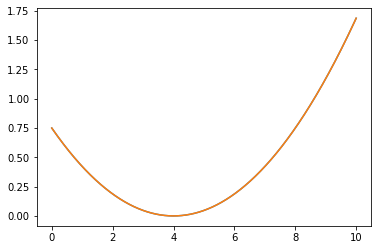

In [26]:
plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)

In [27]:
volume(1)

2.878125

In [28]:
secant_line(volume,0.999,1.001)(1)

2.8781248593749997

In [29]:
instantaneous_flow_rate(volume,8)

0.75

In [30]:
def sign(x):
    return x / abs(x)

In [31]:
instantaneous_flow_rate(sign,0)

Exception: Derivative did not converge

In [46]:
def small_volume_change(q,t,dt):
    return q(t) * dt

In [47]:
small_volume_change(flow_rate,2,1)

0.1875

In [48]:
volume(3) - volume(2)

0.109375

In [49]:
def volume_change(q,t1,t2,dt):
    return sum(small_volume_change(q,t,dt)
                  for t in np.arange(t1,t2,dt))

In [50]:
volume_change(flow_rate,0,10,0.1)

4.32890625

In [51]:
volume_change(flow_rate,0,6,0.0001)

1.1250281254687584

In [52]:
volume_change(flow_rate,6,10,0.0001)

3.2499250003043416

In [53]:
def approximate_volume(q,v0,dt,T):
    return v0 + volume_change(q,0,T,dt)

In [54]:
def approximate_volume_function(q,v0,dt):
    def volume_function(T):
        return approximate_volume(q,v0,dt,T)
    return volume_function

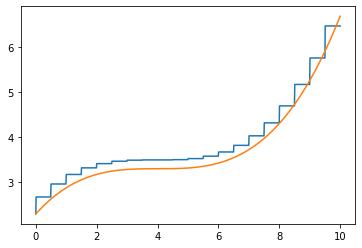

In [55]:
plot_function(approximate_volume_function(flow_rate,2.3,0.5),0,10)
plot_function(volume,0,10)

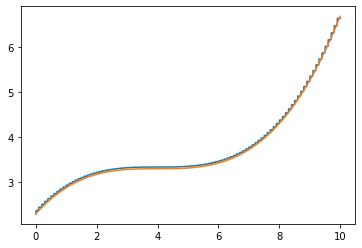

In [56]:
plot_function(approximate_volume_function(flow_rate,2.3,0.1),0,10)
plot_function(volume,0,10)

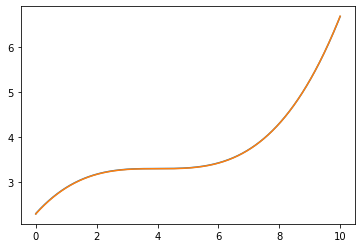

In [57]:
plot_function(approximate_volume_function(flow_rate,2.3,0.01),0,10)
plot_function(volume,0,10)

In [58]:
def get_volume_function(q,v0,digits=6):
    def volume_function(T):
        tolerance = 10 ** (-digits)
        dt = 1
        approx = v0 + volume_change(q,0,T,dt)
        for i in range(0,digits*2):
            dt = dt / 10
            next_approx = v0 + volume_change(q,0,T,dt)
            if abs(next_approx - approx) < tolerance:
                return round(next_approx,digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")
    return volume_function

In [59]:
v = get_volume_function(flow_rate,2.3)

In [60]:
v(1)

2.878125